# Text Embeddings : Words to Vectors

Computers understand semantic meaning by converting words and sentences into numerical vectors

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

plt.style.use("seaborn-v0_8-whitegrid")
np.random.seed(42)

## Loading an Embedding Model

`all-MiniLM-L6-v2` model, creates 384-dimensional embeddings and is optimized for semantic similarity tasks

In [3]:
name = "all-MiniLM-L6-v2"
embedding_model = SentenceTransformer(name)

In [4]:
print(f"Embedding model : {name}")
print(f"Dimension : {embedding_model.get_sentence_embedding_dimension()}")

Embedding model : all-MiniLM-L6-v2
Dimension : 384


## Creating and Examining Embeddings

Create embeddings for some sentences grouped by topic

In [5]:
# Example sentences grouped by topic
sentences = [
    # AI/ML related sentences
    "I love machine learning and artificial intelligence.",
    "AI and ML are fascinating fields of study.",
    
    # Weather related sentences
    "The weather is beautiful today.",
    "It'4 a sunny day with clear skies.",
    
    # Python related sentences
    "Python is my favorite programming language.",
    "I enjoy coding in Python for data analysis."
]

# Topic labels for visualization
topics = ["AI/ML", "AI/ML", "Weather", "Weather", "Python", "Python"]

# Display sentences with their topics
for i,(sentence, topic) in enumerate(zip(sentences, topics)):
    print(f"- Sentence {i + 1}, topic : {topic}, Sentence : '{sentence}'")

- Sentence 1, topic : AI/ML, Sentence : 'I love machine learning and artificial intelligence.'
- Sentence 2, topic : AI/ML, Sentence : 'AI and ML are fascinating fields of study.'
- Sentence 3, topic : Weather, Sentence : 'The weather is beautiful today.'
- Sentence 4, topic : Weather, Sentence : 'It'4 a sunny day with clear skies.'
- Sentence 5, topic : Python, Sentence : 'Python is my favorite programming language.'
- Sentence 6, topic : Python, Sentence : 'I enjoy coding in Python for data analysis.'


In [6]:
embeddings = embedding_model.encode(sentences)

In [7]:
# Display embedding information
print(f"Shape : {embeddings[0].shape}")
print(f"Number of embeddings : {len(embeddings)}")

Shape : (384,)
Number of embeddings : 6


In [8]:
# Peek embeddings
embeddings[:3]

array([[-0.0023948 , -0.07797176,  0.07681463, ...,  0.04355126,
         0.01554042, -0.07140832],
       [ 0.00069689, -0.08437712,  0.03136474, ...,  0.04903705,
         0.00748062, -0.05109915],
       [ 0.01307235,  0.11939918,  0.16268443, ..., -0.01873479,
        -0.05871224,  0.040689  ]], dtype=float32)

In [9]:
print(f"Min: {embeddings[0].min():.4f}, Max: {embeddings[0].max():.4f}, Mean: {embeddings[0].mean():.4f}")

Min: -0.1715, Max: 0.1487, Mean: 0.0017


## Measuring Similarity with Cosine Similarity

- Measures the cosine of the angle between two vectors
- Ranges from -1 to 1
- Higher values indicate greater semantic similarity

In [10]:
# Calculate cosine similarity between all pairs of embeddings
similarity_matrix = cosine_similarity(embeddings)

# Display the similarity matrix
np.set_printoptions(precision=4, suppress=True)
print("Cosine Similarity Matrix :")
print(similarity_matrix)

Cosine Similarity Matrix :
[[1.     0.6934 0.0295 0.0119 0.5063 0.4714]
 [0.6934 1.     0.0107 0.0277 0.2927 0.3494]
 [0.0295 0.0107 1.     0.6547 0.0592 0.0082]
 [0.0119 0.0277 0.6547 1.     0.0339 0.0219]
 [0.5063 0.2927 0.0592 0.0339 1.     0.7249]
 [0.4714 0.3494 0.0082 0.0219 0.7249 1.    ]]


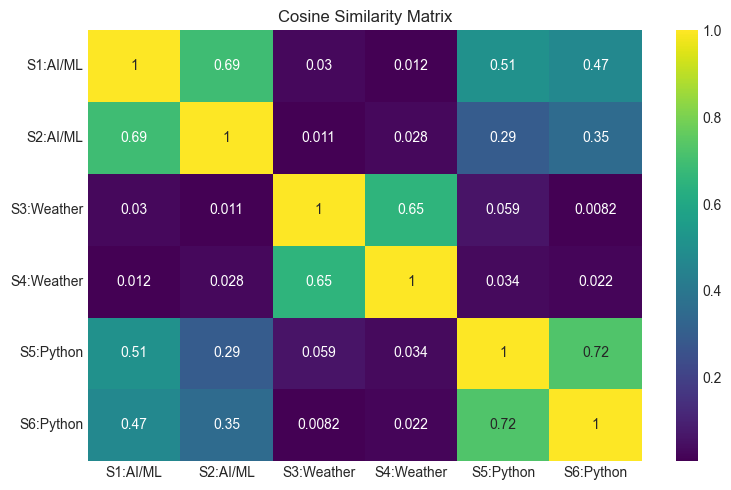

In [11]:
# Create labels for our heatmap
labels = [f"S{i + 1}:{topic}" for i,topic in enumerate(topics)]

plt.figure(figsize=(8, 5))
sns.heatmap(similarity_matrix, annot=True, cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.title("Cosine Similarity Matrix")
plt.tight_layout()
plt.show()

## Visualizing Embeddings in 2D Space

PCA to reduce 384-dimensional embeddings to 2D for visualization

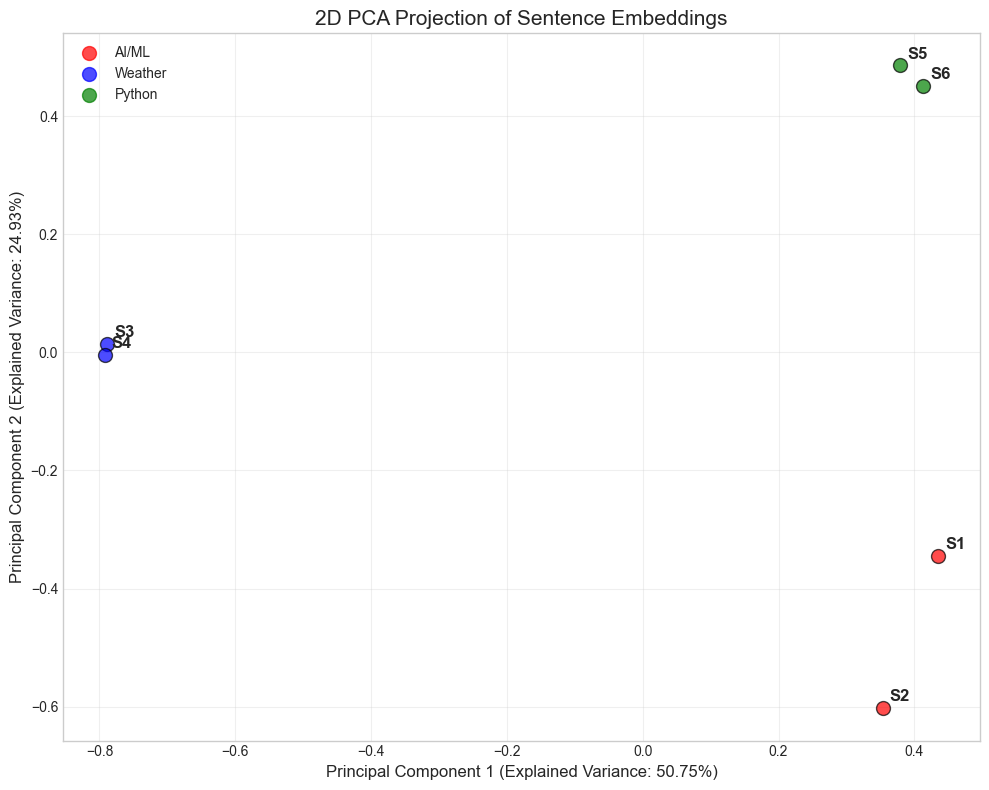

Sentences on the same topic cluster together in the 2D space
The two principal components capture 75.68% of the total variance


In [12]:
# Reduce embeddings to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Set up colors for topics
topic_colors = {"AI/ML": "red", "Weather": "blue", "Python": "green"}
colors = [topic_colors[topic] for topic in topics]

# Plot the 2D embeddings
plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(pca_embeddings):
    plt.scatter(x, y, c=colors[i], s=100, alpha=0.7, edgecolors="black")
    plt.annotate(f"S{i+1}", 
                xy=(x, y), 
                xytext=(5, 5), 
                textcoords="offset points",
                fontsize=12,
                weight="bold")

# Add a legend
for topic, color in topic_colors.items():
    plt.scatter([], [], c=color, label=topic, s=100, alpha=0.7)
plt.legend(loc="upper left")

# Add title and labels
plt.title("2D PCA Projection of Sentence Embeddings", fontsize=15)
plt.xlabel(f"Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})", fontsize=12)
plt.ylabel(f"Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Sentences on the same topic cluster together in the 2D space")
print(f"The two principal components capture {sum(pca.explained_variance_ratio_):.2%} of the total variance")

## Testing with New Sentences

how the model handles new sentences related to the original topics

In [13]:
# Define new sentences
new_sentences = [
    "Deep learning has revolutionized computer vision.",  # AI/ML related
    "The forecast predicts rain for tomorrow.",           # Weather related
    "NumPy and Pandas are essential Python libraries."    # Python related
]

# Create embeddings for the new sentences
new_embeddings = embedding_model.encode(new_sentences)

# Calculate similarity between new and original sentences
similarity_to_original = cosine_similarity(new_embeddings, embeddings)

# Find the most similar original sentence for each new sentence
for i, new_sent in enumerate(new_sentences):
    # Get index of most similar original sentence
    most_similar_idx = np.argmax(similarity_to_original[i])
    print(f"- New : '{new_sent}'")
    print(f"Most similar to : '{sentences[most_similar_idx]}'")
    print(f"Similarity score : {similarity_to_original[i][most_similar_idx]:.4f}")
    print(f"Topic : {topics[most_similar_idx]}")
    print()

- New : 'Deep learning has revolutionized computer vision.'
Most similar to : 'AI and ML are fascinating fields of study.'
Similarity score : 0.4022
Topic : AI/ML

- New : 'The forecast predicts rain for tomorrow.'
Most similar to : 'The weather is beautiful today.'
Similarity score : 0.4943
Topic : Weather

- New : 'NumPy and Pandas are essential Python libraries.'
Most similar to : 'I enjoy coding in Python for data analysis.'
Similarity score : 0.6019
Topic : Python



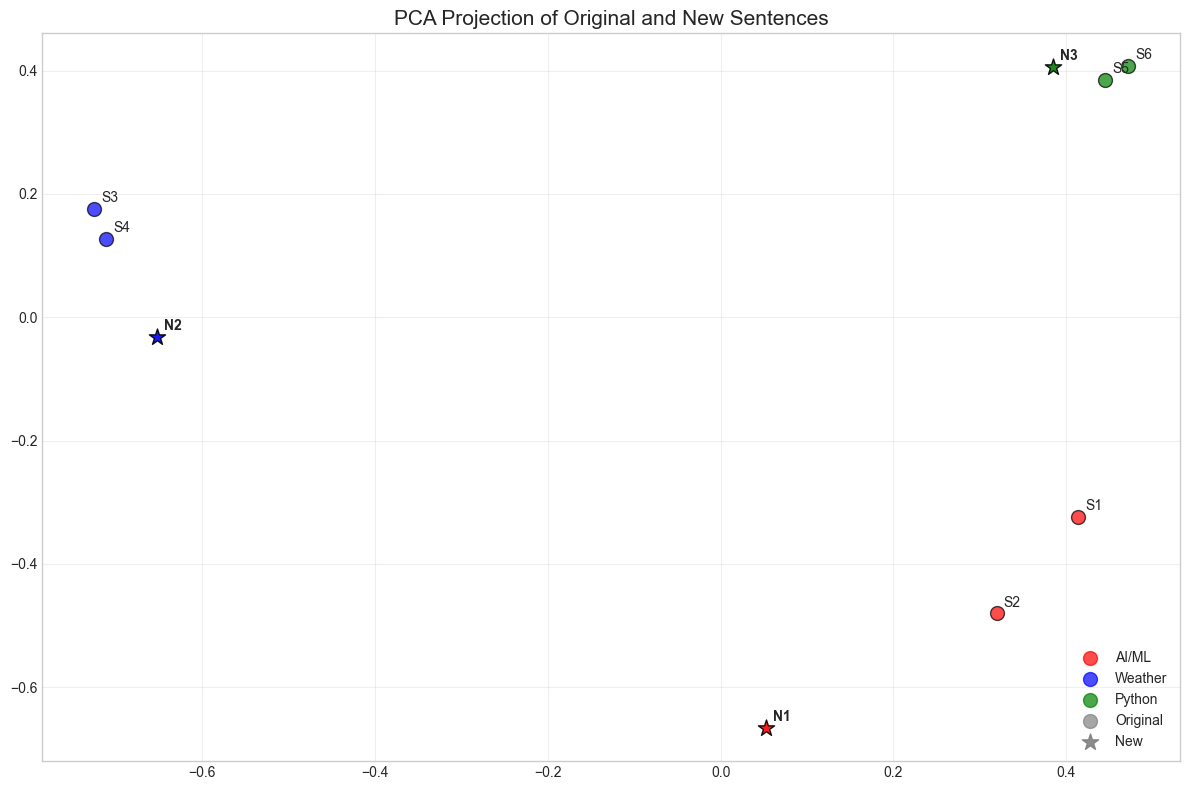

New sentences (stars) appear close to their semantically related original sentences


In [14]:
# Combine original and new embeddings
all_embeddings = np.vstack([embeddings, new_embeddings])
all_topics = topics + ["AI/ML", "Weather", "Python"]

# Project to 2D using PCA
pca = PCA(n_components=2)
all_embeddings_2d = pca.fit_transform(all_embeddings)

# Create visualization
plt.figure(figsize=(12, 8))

# Plot original sentences
for i in range(len(sentences)):
    x, y = all_embeddings_2d[i]
    plt.scatter(x, y, c=topic_colors[all_topics[i]], s=100, alpha=0.7, edgecolors="black")
    plt.annotate(f"S{i+1}", xy=(x, y), xytext=(5, 5), textcoords="offset points", fontsize=10)

# Plot new sentences with star markers
for i in range(len(sentences), len(sentences) + len(new_sentences)):
    x, y = all_embeddings_2d[i]
    plt.scatter(x, y, c=topic_colors[all_topics[i]], s=150, alpha=0.9, marker="*", edgecolors="black")
    plt.annotate(f"N{i-len(sentences)+1}", xy=(x, y), xytext=(5, 5), textcoords="offset points", fontsize=10, weight="bold")

# Add a legend
for topic, color in topic_colors.items():
    plt.scatter([], [], c=color, label=topic, s=100, alpha=0.7)
plt.scatter([], [], c="gray", marker="o", s=100, label="Original", alpha=0.7)
plt.scatter([], [], c="gray", marker="*", s=150, label="New", alpha=0.9)
plt.legend(loc="lower right")

plt.title("PCA Projection of Original and New Sentences", fontsize=15)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("New sentences (stars) appear close to their semantically related original sentences")

### Real-World Applications of Embeddings

1. **Semantic Search** : Finding documents based on meaning rather than just keywords
2. **Document Clustering** : Automatically grouping similar documents
3. **Recommendation Systems** : Suggesting similar items based on semantic content
4. **Question Answering** : Finding relevant information to answer queries
5. **Retrieval Augmented Generation (RAG)** : Combining LLMs with knowledge bases using embeddings


Embeddings serve as the bridge between human language and machine understanding, forming the foundation of many modern NLP systems.